In [1]:
import pyreadstat
import os
import pandas as pd
import numpy as np

# Read the SAV file into a Pandas DataFrame
data, meta = pyreadstat.read_sav('GSS2018.sav')

# Save the DataFrame to a CSV file
data.to_csv('GSS2018.csv', index=False)

print("GSS7218_R3.sav file has been converted to GSS2018.csv.")

print("Current Working Directory:", os.getcwd())

GSS7218_R3.sav file has been converted to GSS2018.csv.
Current Working Directory: c:\Users\qaism\OneDrive - University of Virginia\Documents\GitHub\group14


In [22]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('GSS2018.csv')

# Display general information about the dataset
print("===== General Information =====")
df.info()
# Display the shape of the dataset
print("\n===== Shape of Dataset =====")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
# Display the number of missing values in each column
print("\n===== Missing Values Count (Top 10) =====")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Display the number of unique values in each column
print("\n===== Unique Values Count (Top 10) =====")
print(df.nunique().sort_values(ascending=False).head(10))

===== General Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Columns: 1065 entries, ABANY to ZODIAC
dtypes: float64(1065)
memory usage: 19.1 MB

===== Shape of Dataset =====
Number of Rows: 2348
Number of Columns: 1065

===== Missing Values Count (Top 10) =====
AWAY7      2347
WHERE7     2347
AWAY5      2346
MHP5R2     2346
AWAY6      2346
RELSP10    2346
MAR9       2346
OLD10      2346
MHP3R2     2346
MHP4R2     2346
dtype: int64

===== Unique Values Count (Top 10) =====
ID           2348
WTSSNR        399
OCC10         381
PAOCC10       321
SEI10INC      304
SEI10EDUC     298
SPOCC10       297
SEI10         295
ISCO08        275
PASEI10       270
dtype: int64


In [2]:
import json

# Load the JSON file containing the column definitions
json_file_path = r'C:\Users\qaism\OneDrive - University of Virginia\Documents\GitHub\group14\GSS_Codebook_index.json'
with open(json_file_path, 'r') as f:
    column_definitions_from_json = json.load(f)

# Load your dataset
df = pd.read_csv('GSS2018.csv')  # Adjust this path as needed

# Create a DataFrame to match columns in the dataset with their definitions from the JSON file
column_match_df_from_json = pd.DataFrame({
    'Column_Name': df.columns,
    'Definition': [column_definitions_from_json.get(col, 'Not Found') for col in df.columns]
})

# Display the DataFrame
print(column_match_df_from_json.head(10))

  Column_Name                                         Definition
0       ABANY  ABORTION IF W OMAN W ANTS FOR ANY REASON\nPage...
1    ABDEFECT                    STRONG CHANCE OF SERIOUS DEFECT
2    ABFELEGL  W OMEN ONLY: W OMEN SHOULD BE ABLE TO HAVE LEG...
3     ABHELP1                                          Not Found
4     ABHELP2            R W OULD HELP W ITH PAYING FOR ABORTION
5     ABHELP3  R W OULD HELP W ITH PAYING FOR ABORTION-RELATE...
6     ABHELP4  R W OULD HELP W ITH EMOTIONAL SUPPORT FOR ABOR...
7      ABHLTH               W OMAN'S HEALTH SERIOUSLY ENDANGERED
8    ABINSPAY                                          Not Found
9   ABMEDGOV1  W OMAN AND DOCTOR OR GOVT SHOULD DECIDE W HAT ...


In [3]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Check for missing values
print("Missing Values:")
print(df_cleaned.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df_cleaned.duplicated().sum())

# Check data types
print("\nData Types:")
print(df_cleaned.dtypes)

# Summary statistics for numerical variables
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Check unique values for categorical variables
print("\nUnique Values for Categorical Variables:")
for column in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"{column}: {df_cleaned[column].unique()}")

Missing Values:
RELIG         0
CHILDS        1
AGEKDBRN    662
EDUC          2
HAPPY         2
ATTEND        9
GOD          19
INCOME16    172
FAMGEN        0
RELIG16      10
RELITEN      22
DEGREE        0
AGE           5
SEX           0
RACE          0
MARITAL       1
POLVIEWS     82
HRS1        945
dtype: int64

Duplicate Rows:
0

Data Types:
RELIG        object
CHILDS      float64
AGEKDBRN    float64
EDUC        float64
HAPPY       float64
ATTEND       object
GOD         float64
INCOME16    float64
FAMGEN      float64
RELIG16      object
RELITEN      object
DEGREE       object
AGE         float64
SEX         float64
RACE        float64
MARITAL     float64
POLVIEWS    float64
HRS1        float64
dtype: object

Summary Statistics:
            CHILDS     AGEKDBRN         EDUC        HAPPY          GOD  \
count  2319.000000  1658.000000  2318.000000  2318.000000  2301.000000   
mean      1.863303    24.285887    13.745470     1.843399     4.863972   
std       1.674772     5.720111   

In [4]:
df_cleaned.dropna(inplace=True)

# Or to fill missing values in a specific column with the mean:
df_cleaned['AGEKDBRN'].fillna(df_cleaned['AGEKDBRN'].mean(), inplace=True)
# For example, converting 'AGE' to integers
df_cleaned['AGE'] = df_cleaned['AGE'].astype(int)
from scipy import stats
z_scores = stats.zscore(df_cleaned[['AGE']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
df_cleaned_outliers_removed = df_cleaned[~outliers]

In [5]:
# Load the original dataset
df = pd.read_csv('GSS2018.csv')  # Adjust the path as needed

# List of variables of interest
variables_of_interest = ['RELIG', 'CHILDS', 'AGEKDBRN', 'EDUC', 'HAPPY', 'ATTEND', 'GOD', 'INCOME16', 'FAMGEN', 'RELIG16', 'RELITEN', 'DEGREE']

# Additional potentially important demographic columns
additional_columns = ['AGE', 'SEX', 'RACE']

# Combine both lists to get all columns to keep
all_columns_to_keep = variables_of_interest + additional_columns

# Create a new DataFrame with only the selected columns
df_selected = df[all_columns_to_keep]

# Show the first few rows of the new DataFrame to verify
print(df_selected.head())

   RELIG  CHILDS  AGEKDBRN  EDUC  HAPPY  ATTEND  GOD  INCOME16  FAMGEN  \
0   11.0     0.0       NaN  14.0    2.0     5.0  6.0       NaN     1.0   
1    2.0     3.0      21.0  10.0    1.0     2.0  6.0      16.0     2.0   
2    4.0     2.0      35.0  16.0    1.0     2.0  5.0      25.0     2.0   
3    1.0     2.0      32.0  16.0    1.0     6.0  6.0      26.0     1.0   
4    2.0     0.0       NaN  18.0    2.0     8.0  6.0      26.0     1.0   

   RELIG16  RELITEN  DEGREE   AGE  SEX  RACE  
0      1.0      1.0     2.0  43.0  1.0   1.0  
1      2.0      1.0     1.0  74.0  2.0   1.0  
2      2.0      4.0     3.0  42.0  1.0   1.0  
3      2.0      1.0     3.0  63.0  2.0   1.0  
4      2.0      1.0     4.0  71.0  1.0   2.0  


In [6]:
# Mapping codes to labels for the 'RELIG' column
relig_map = {
    -99: 'No answer',
    -98: 'Do not Know/Cannot Choose',
    -97: 'Skipped on Web',
    -80: 'Not available in this release',
    1: 'Protestant',
    2: 'Catholic',
    3: 'Jewish',
    4: 'None',
    5: 'Other',
    6: 'Buddhism',
    7: 'Hinduism',
    8: 'Other eastern religions',
    9: 'Muslim/Islam',
    10: 'Orthodox-christian',
    11: 'Christian',
    12: 'Native american',
    13: 'Inter-nondenominational'
}
df['RELIG'].replace(relig_map, inplace=True)

# Mapping codes to labels for the 'ATTEND' column
attend_map = {
    -100: 'Inapplicable',
    -99: 'No answer',
    -98: 'Do not Know/Cannot Choose',
    -97: 'Skipped on Web',
    0: 'Never',
    1: 'Less than once a year',
    2: 'About once or twice a year',
    3: 'Several times a year',
    4: 'About once a month',
    5: '2-3 times a month',
    6: 'Nearly every week',
    7: 'Every week',
    8: 'Several times a week'
}
df['ATTEND'].replace(attend_map, inplace=True)

# Mapping codes to labels for the 'RELIG16' column
relig16_map = {
    -100: 'Inapplicable',
    -99: 'No answer',
    -98: 'Do not Know/Cannot Choose',
    -97: 'Skipped on Web',
    -80: 'Not available in this release',
    1: 'PROTESTANT',
    2: 'CATHOLIC',
    3: 'JEWISH',
    4: 'NONE',
    5: 'OTHER',
    6: 'BUDDHISM',
    7: 'HINDUISM',
    8: 'OTHER EASTERN',
    9: 'MUSLIM/ISLAM',
    10: 'ORTHODOX-CHRISTIAN',
    11: 'CHRISTIAN',
    12: 'NATIVE AMERICAN',
    13: 'INTER-NONDENOMINATIONAL'
}
df['RELIG16'].replace(relig16_map, inplace=True)

# Mapping codes to labels for the 'RELITEN' column
reliten_map = {
    -100: 'Inapplicable',
    -99: 'No answer',
    -98: 'Do not Know/Cannot Choose',
    -80: 'Not available in this release',
    -70: 'Not available in this year',
    1: 'Strong',
    2: 'Not very strong',
    3: 'Somewhat strong (vol.)',
    4: 'No religion'
}
df['RELITEN'].replace(reliten_map, inplace=True)

# Mapping codes to labels for the 'DEGREE' column
degree_map = {
    -99: 'No answer',
    -98: 'Do not Know/Cannot Choose',
    -97: 'Skipped on Web',
    0: 'Less than high school',
    1: 'High school',
    2: 'Associate/junior college',
    3: 'Bachelor\'s',
    4: 'Graduate'
}
df['DEGREE'].replace(degree_map, inplace=True)

In [7]:
# Create a new DataFrame to match only the columns present in df_selected with their definitions from the JSON file
df_selected_definitions = column_match_df_from_json[column_match_df_from_json['Column_Name'].isin(df_selected.columns)]

# Remove any definitions from the JSON that are not found in df_selected
df_selected_definitions = df_selected_definitions[df_selected_definitions['Definition'] != 'Not Found']

# Display the DataFrame with selected column definitions
print(df_selected_definitions)

    Column_Name                                 Definition
28          AGE                          AGE OF RESPONDENT
30     AGEKDBRN               R'S AGE W HEN 1ST CHILD BORN
36       ATTEND    HOW  OFTEN R ATTENDS RELIGIOUS SERVICES
73       CHILDS                         NUMBER OF CHILDREN
172      DEGREE          R'S HIGHEST DEGREE\nPage 3\nIndex
199        EDUC           HIGHEST YEAR OF SCHOOL COMPLETED
232      FAMGEN  NUMBER OF FAMILY GENERATIONS IN HOUSEHOLD
283         GOD     R'S CONFIDENCE IN THE EXISTENCE OF GOD
297       HAPPY                          GENERAL HAPPINESS
371    INCOME16                        TOTAL FAMILY INCOME
709        RACE                         RACE OF RESPONDENT
768       RELIG                   R'S RELIGIOUS PREFERENCE
769     RELIG16                  RELIGION IN W HICH RAISED
773     RELITEN                   STRENGTH OF AFFI LIATION
853         SEX                            RESPONDENTS SEX


In [8]:
# List of additional important columns that are verified to be in the original CSV
verified_additional_important_columns = ['MARITAL', 'POLVIEWS', 'HRS1']

# Update the list of all columns to keep with verified columns
all_columns_to_keep_updated = all_columns_to_keep + verified_additional_important_columns

df_selected_updated = df[all_columns_to_keep_updated]
print(df_selected_updated.head())

        RELIG  CHILDS  AGEKDBRN  EDUC  HAPPY                      ATTEND  GOD  \
0   Christian     0.0       NaN  14.0    2.0           2-3 times a month  6.0   
1    Catholic     3.0      21.0  10.0    1.0  About once or twice a year  6.0   
2        None     2.0      35.0  16.0    1.0  About once or twice a year  5.0   
3  Protestant     2.0      32.0  16.0    1.0           Nearly every week  6.0   
4    Catholic     0.0       NaN  18.0    2.0        Several times a week  6.0   

   INCOME16  FAMGEN     RELIG16      RELITEN                    DEGREE   AGE  \
0       NaN     1.0  PROTESTANT       Strong  Associate/junior college  43.0   
1      16.0     2.0    CATHOLIC       Strong               High school  74.0   
2      25.0     2.0    CATHOLIC  No religion                Bachelor's  42.0   
3      26.0     1.0    CATHOLIC       Strong                Bachelor's  63.0   
4      26.0     1.0    CATHOLIC       Strong                  Graduate  71.0   

   SEX  RACE  MARITAL  POLVIEWS 

In [9]:
# Convert data types where needed using .loc[]
df_selected_updated.loc[:, 'INCOME16'] = pd.to_numeric(df_selected_updated['INCOME16'], errors='coerce')

# Handle outliers: for demonstration, capping 'AGE' at 100
df_selected_updated.loc[:, 'AGE'] = df_selected_updated['AGE'].apply(lambda x: min(x, 100))

# Normalize text data: for demonstration, converting 'RELIG' to uppercase
df_selected_updated.loc[:, 'RELIG'] = df_selected_updated['RELIG'].astype(str).str.upper()

# Drop rows with more than 3 missing values
df_cleaned = df_selected_updated.dropna(thresh=len(df_selected_updated.columns) - 3)

# Show the first few rows of the cleaned DataFrame to verify
print(df_cleaned.head())

        RELIG  CHILDS  AGEKDBRN  EDUC  HAPPY                      ATTEND  GOD  \
0   CHRISTIAN     0.0       NaN  14.0    2.0           2-3 times a month  6.0   
1    CATHOLIC     3.0      21.0  10.0    1.0  About once or twice a year  6.0   
2        NONE     2.0      35.0  16.0    1.0  About once or twice a year  5.0   
3  PROTESTANT     2.0      32.0  16.0    1.0           Nearly every week  6.0   
4    CATHOLIC     0.0       NaN  18.0    2.0        Several times a week  6.0   

   INCOME16  FAMGEN     RELIG16      RELITEN                    DEGREE   AGE  \
0       NaN     1.0  PROTESTANT       Strong  Associate/junior college  43.0   
1      16.0     2.0    CATHOLIC       Strong               High school  74.0   
2      25.0     2.0    CATHOLIC  No religion                Bachelor's  42.0   
3      26.0     1.0    CATHOLIC       Strong                Bachelor's  63.0   
4      26.0     1.0    CATHOLIC       Strong                  Graduate  71.0   

   SEX  RACE  MARITAL  POLVIEWS 

In [10]:
df_cleaned.to_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv', index=False)


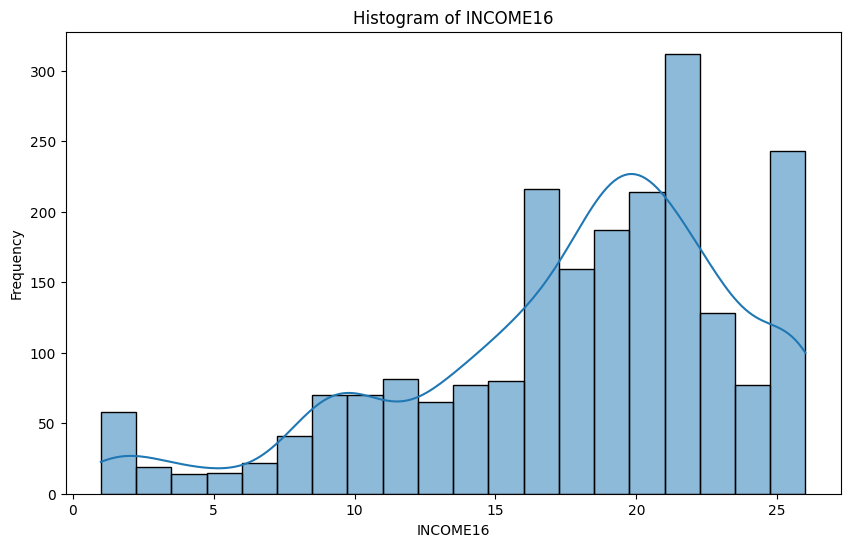

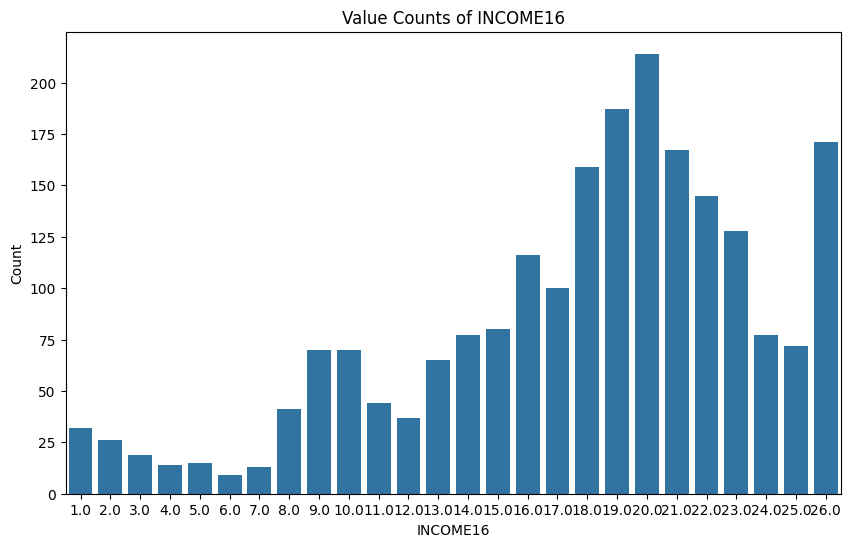

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['INCOME16'], bins=20, kde=True)
plt.title('Histogram of INCOME16')
plt.xlabel('INCOME16')
plt.ylabel('Frequency')
plt.show()


# Value Counts (Bar Chart)
# If 'INCOME16' is categorical or has a small number of unique values
value_counts = df_cleaned['INCOME16'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Value Counts of INCOME16')
plt.xlabel('INCOME16')
plt.ylabel('Count')
plt.show()
